CLEAN THE DATA

In [2]:
#imports
import pandas as pd
import numpy as np
#load file
dataset = pd.read_csv(r"Dataset\dataset.csv")
dataset.head(2)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
def clean_data(x):                                                                            #we define a "cleaning" function which removes any spaces in front or after the string
    if isinstance(x, str):                                                                    #Check if (object,type)
        return x.strip().replace("  ", " ").replace(" _", "_").replace("_ ", "_")             #eemove spaces from both ends of the string
    else:
        return x  


# apply the function to each column
for col in dataset.columns:
    dataset[col] = dataset[col].map(clean_data)

    
#check the output
dataset.head(2)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CHECKLIST

In [4]:
#we now will make the checklist of all symptoms
#List of symptom columns
symptom_cols = [
    'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5',
    'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10',
    'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15',
    'Symptom_16', 'Symptom_17'
]
#create the empty list to store all symptoms
all_symptoms = []

for col in symptom_cols:                           # go through each Symptom_1 to Symptom_17 column
    for symptom in dataset[col]:                   # go through every value in that column
        if pd.notna(symptom):                      # check if the cell is not nan
            all_symptoms.append(symptom)           # add it to the list

unique_symptoms = sorted(list(set(all_symptoms)))  #to remove the duplicates with set, we make them again a list (makes it usable for indexing and loops) and we soort them alphabetically in order to read them easier


#print how many symptoms we found
print("Number of unique symptoms:", len(unique_symptoms))
print("Symptoms:", unique_symptoms)


Number of unique symptoms: 131
Symptoms: ['abdominal_pain', 'abnormal_menstruation', 'acidity', 'acute_liver_failure', 'altered_sensorium', 'anxiety', 'back_pain', 'belly_pain', 'blackheads', 'bladder_discomfort', 'blister', 'blood_in_sputum', 'bloody_stool', 'blurred_and_distorted_vision', 'breathlessness', 'brittle_nails', 'bruising', 'burning_micturition', 'chest_pain', 'chills', 'cold_hands_and_feets', 'coma', 'congestion', 'constipation', 'continuous_feel_of_urine', 'continuous_sneezing', 'cough', 'cramps', 'dark_urine', 'dehydration', 'depression', 'diarrhoea', 'dischromic_patches', 'distention_of_abdomen', 'dizziness', 'drying_and_tingling_lips', 'enlarged_thyroid', 'excessive_hunger', 'extra_marital_contacts', 'family_history', 'fast_heart_rate', 'fatigue', 'fluid_overload', 'foul_smell_of urine', 'headache', 'high_fever', 'hip_joint_pain', 'history_of_alcohol_consumption', 'increased_appetite', 'indigestion', 'inflammatory_nails', 'internal_itching', 'irregular_sugar_level', '

In [5]:
# Assume you want to keep the original disease/diagnosis column
#Each unique symptom becomes column, instead of writing symptom names, we have 1 if patient has the syptom and 0 if not


binary = pd.DataFrame()                 #Create a new, empty table (DataFrame) named binary to hold the simplified data
binary['Disease'] = dataset['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

#for each syptom we check each row
for symptom in unique_symptoms:
    binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
#so what we basically did : For each symptom in your list, check every patient.Mark 1 if the patient has this symptom anywhere, or 0 if not



C:\Users\leand\AppData\Local\Temp\ipykernel_17028\1969741832.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\leand\AppData\Local\Temp\ipykernel_17028\1969741832.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  binary[symptom] = dataset[symptom_cols].eq(symptom).any(axis=1).astype(int)
C:\Users\leand\AppData\Local\Temp\ipykernel_17028\1969741832.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

In [6]:
#severity score encoding --> Instead of using 1 for "symptom present", we now use a severity score like 3, 4, or 5 (based on the symptom’s usual intensity)

# Load severity score
severity = pd.read_csv("Dataset\symptom_severity.csv")
severity_dict = dict(zip(severity['Symptom'], severity['weight'])) #creates a dictionary from the table

# Create a new copy of the dataset for severity version
severity_w = pd.DataFrame()
severity_w['Disease'] = dataset['Disease']

# Fill with weights instead of 1s
for symptom in unique_symptoms:
    # Check if each symptom is present
    symptom_present = dataset[symptom_cols].eq(symptom).any(axis=1)

    # Replace True with severity weight, False with 0
    severity_w[symptom] = symptom_present.astype(int) * severity_dict.get(symptom, 0)  

C:\Users\leand\AppData\Local\Temp\ipykernel_17028\554767338.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  severity_w[symptom] = symptom_present.astype(int) * severity_dict.get(symptom, 0)
C:\Users\leand\AppData\Local\Temp\ipykernel_17028\554767338.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  severity_w[symptom] = symptom_present.astype(int) * severity_dict.get(symptom, 0)
C:\Users\leand\AppData\Local\Temp\ipykernel_17028\554767338.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

In [7]:
print(severity_w.iloc[31])  # Display the 31st row and all columns


Disease                  Chronic cholestasis
abdominal_pain                             4
abnormal_menstruation                      0
acidity                                    0
acute_liver_failure                        0
                                ...         
weight_loss                                0
yellow_crust_ooze                          0
yellow_urine                               0
yellowing_of_eyes                          4
yellowish_skin                             3
Name: 31, Length: 132, dtype: object


LETS TRAIN BOTH NOW

In [8]:
#imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

MODEL 1(BINARY)


In [9]:
#Prepare the data
X_binary = binary.drop(columns=['Disease'])  # All columns except Disease
y_binary = binary['Disease']  # Target column

#Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model_binary = DecisionTreeClassifier(random_state=42)
dt_model_binary.fit(X_train_bin, y_train_bin)

# Make predictions
y_pred_binary = dt_model_binary.predict(X_test_bin)

# Evaluate the model
accuracy_binary = accuracy_score(y_test_bin, y_pred_binary)
print(f"Binary Encoding Accuracy: {accuracy_binary * 100:.2f}%")


Binary Encoding Accuracy: 100.00%


MODEL 2 (SEVERITY SCORES)

In [10]:
#prepare data
X_severity = severity_w.drop(columns=['Disease'])  # Dropping target column
y_severity = severity_w['Disease']  # Target column (disease)

# Split the data into training and testing sets
X_train_severity, X_test_severity, y_train_severity, y_test_severity = train_test_split(X_severity, y_severity, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model_severity = DecisionTreeClassifier(random_state=42)
dt_model_severity.fit(X_train_severity, y_train_severity)

# Make predictions
y_pred_severity = dt_model_severity.predict(X_test_severity)

# Evaluate the model
accuracy_severity = accuracy_score(y_test_severity, y_pred_severity)
print(f"Severity Encoding Accuracy: {accuracy_severity * 100:.2f} %")


Severity Encoding Accuracy: 100.00 %


hmmmm..i dont know what the **** is going on

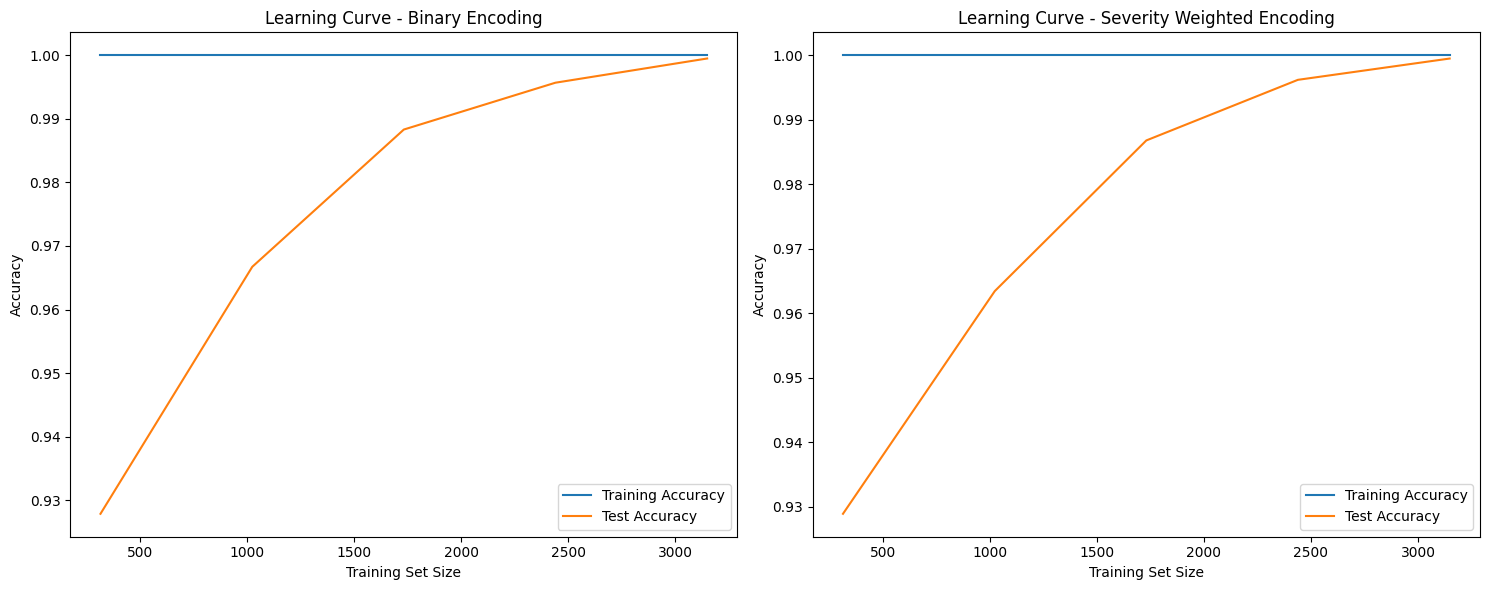

In [11]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(dt_model_binary, X_train_bin, y_train_bin, cv=5, scoring='accuracy')
train_sizes_w, train_scores_w, test_scores_w = learning_curve(dt_model_severity, X_train_severity, y_train_severity, cv=5, scoring='accuracy')
# Create the plots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot learning curve for binary
axes[0].plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
axes[0].plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
axes[0].set_title('Learning Curve - Binary Encoding')
axes[0].set_xlabel('Training Set Size')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot learning curve for severity_w
axes[1].plot(train_sizes_w, train_scores_w.mean(axis=1), label='Training Accuracy')
axes[1].plot(train_sizes_w, test_scores_w.mean(axis=1), label='Test Accuracy')
axes[1].set_title('Learning Curve - Severity Weighted Encoding')
axes[1].set_xlabel('Training Set Size')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()


In [12]:
from sklearn.model_selection import cross_val_score


# Perform cross-validation with 5 folds
cv_scores = cross_val_score(dt_model_binary, X_binary, y_binary, cv=5, scoring='accuracy')

# Output the cross-validation scores for each fold
print(f"Cross-Validation Accuracy for each fold: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.4f}")


Cross-Validation Accuracy for each fold: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0000
Standard Deviation of Accuracy: 0.0000


sure for overfitting (we have small dataset and probably model memorizes the training data) --> use a more complex model like random forest
assume that DT is overly simple thats why 



i tried playing with the depth of the models and if you put it to 5 per say , the accuraccy of the model goes to ~10% or something 
so what if we tried an play with the depth because DT seems to go in great depth and thats the problem

50 0.9888211382113822
50 0.990040650406504


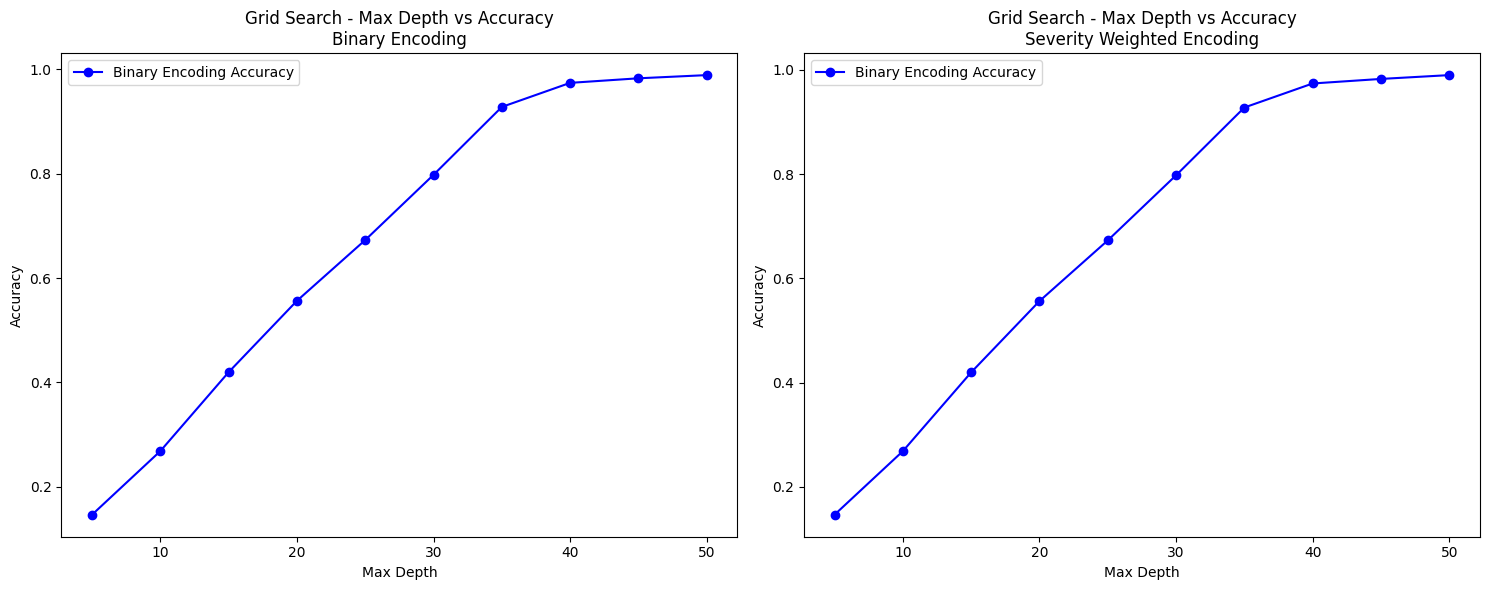

In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth to search
param_grid = {
    'max_depth': range(5,51,5)  # At 60 it goes up to 100% again 
}

    
# Grid search to find the best max_depth (hyperparameter tunning)
grid_search_binary = GridSearchCV(estimator=dt_model_binary, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_binary.fit(X_binary, y_binary)

grid_search_severity_w = GridSearchCV(estimator=dt_model_severity, param_grid = param_grid, cv=5, scoring='accuracy')
grid_search_severity_w.fit(X_severity, y_severity)
# Best depth and its accuracy
best_depth_binary = grid_search_binary.best_params_['max_depth']
best_accuracy_binary = grid_search_binary.best_score_
print(best_depth_binary, best_accuracy_binary)

best_depth_severity_w = grid_search_severity_w.best_params_['max_depth']
best_accuracy_severity_w = grid_search_severity_w.best_score_
print(best_depth_severity_w, best_accuracy_severity_w)


#plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#for binary
axes[0].plot(param_grid['max_depth'], grid_search_binary.cv_results_['mean_test_score'], 'bo-', label='Binary Encoding Accuracy')
axes[0].set_title('Grid Search - Max Depth vs Accuracy\nBinary Encoding')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# for Severity Weighted Encoding
axes[1].plot(param_grid['max_depth'], grid_search_severity_w.cv_results_['mean_test_score'], 'bo-', label='Binary Encoding Accuracy')
axes[1].set_title('Grid Search - Max Depth vs Accuracy\nSeverity Weighted Encoding')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()



as it seems this approach doesnt seem exactly to roll 
but in the dataset we have same disases with similar symptoms or same symptoms+1 more , so maybe we could optimizd the DT approach by groupping the same diseases together --> reduced layers --> better generalization --> not overfitting??

TESTING MODEL WITH FEWER DATAS (Léandre)

In [14]:
databis=dataset.copy() #make a copy of the dataset

databis.head(2) 

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
#keep three first columns of symptoms
databis = databis.iloc[:, :2]

symptom_cols_bis = [
    'Symptom_1'
]

all_symptoms2 = []

for col in symptom_cols_bis:                           # go through each Symptom_1 to Symptom_3 column
    for symptom in databis[col]:                   # go through every value in that column
        if pd.notna(symptom):                      # check if the cell is not nan
            all_symptoms2.append(symptom)           # add it to the list

unique_symptoms2 = sorted(list(set(all_symptoms2)))  #to remove the duplicates with set, we make them again a list (makes it usable for indexing and loops) and we soort them alphabetically in order to read them easier


#print how many symptoms we found
print("Number of unique symptoms:", len(unique_symptoms2))
print("Symptoms:", unique_symptoms2)
print(databis.head(2))

Number of unique symptoms: 34
Symptoms: ['acidity', 'back_pain', 'bladder_discomfort', 'breathlessness', 'burning_micturition', 'chest_pain', 'chills', 'constipation', 'continuous_sneezing', 'cough', 'cramps', 'fatigue', 'headache', 'high_fever', 'indigestion', 'itching', 'joint_pain', 'mood_swings', 'muscle_wasting', 'muscle_weakness', 'neck_pain', 'pain_during_bowel_movements', 'patches_in_throat', 'pus_filled_pimples', 'shivering', 'skin_rash', 'stiff_neck', 'stomach_pain', 'sunken_eyes', 'vomiting', 'weakness_in_limbs', 'weight_gain', 'weight_loss', 'yellowish_skin']
            Disease  Symptom_1
0  Fungal infection    itching
1  Fungal infection  skin_rash


In [31]:
binary_bis = pd.DataFrame()                 #Create a new, empty table (DataFrame) named binary to hold the simplified data
binary_bis['Disease'] = databis['Disease']  #Copy the disease column from the original dataset (dataset) into the binary table

#for each syptom we check each row
for symptom in unique_symptoms2:
    binary_bis[symptom] = databis[symptom_cols_bis].eq(symptom).any(axis=1).astype(int)

In [32]:
severity_bis = pd.read_csv("Dataset\symptom_severity.csv")
severity_dict_bis = dict(zip(severity_bis['Symptom'], severity_bis['weight'])) #creates a dictionary from the table

# Create a new copy of the dataset for severity version
severity_w_bis = pd.DataFrame()
severity_w_bis['Disease'] = dataset['Disease']

# Fill with weights instead of 1s
for symptom in unique_symptoms2:
    # Check if each symptom is present
    symptom_present = dataset[symptom_cols_bis].eq(symptom).any(axis=1)

    # Replace True with severity weight, False with 0
    severity_w_bis[symptom] = symptom_present.astype(int) * severity_dict_bis.get(symptom, 0)  

In [33]:
#Prepare the data
X_binary_bis = binary_bis.drop(columns=['Disease'])  # All columns except Disease
y_binary_bis = binary_bis['Disease']  # Target column

#Split the data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary_bis, y_binary_bis, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model_binary_bis = DecisionTreeClassifier(random_state=42)
dt_model_binary_bis.fit(X_train_bin, y_train_bin)

# Make predictions
y_pred_binary = dt_model_binary_bis.predict(X_test_bin)

# Evaluate the model
accuracy_binary = accuracy_score(y_test_bin, y_pred_binary)
print(f"Binary Encoding Accuracy: {accuracy_binary * 100:.2f}%")

Binary Encoding Accuracy: 36.59%


In [34]:
X_severity_bis = severity_w_bis.drop(columns=['Disease'])  # Dropping target column
y_severity_bis = severity_w_bis['Disease']  # Target column (disease)

# Split the data into training and testing sets
X_train_severity, X_test_severity, y_train_severity, y_test_severity = train_test_split(X_severity_bis, y_severity_bis, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model_severity_bis = DecisionTreeClassifier(random_state=42)
dt_model_severity_bis.fit(X_train_severity, y_train_severity)

# Make predictions
y_pred_severity = dt_model_severity_bis.predict(X_test_severity)

# Evaluate the model
accuracy_severity = accuracy_score(y_test_severity, y_pred_severity)
print(f"Severity Encoding Accuracy: {accuracy_severity * 100:.2f} %")

Severity Encoding Accuracy: 36.59 %


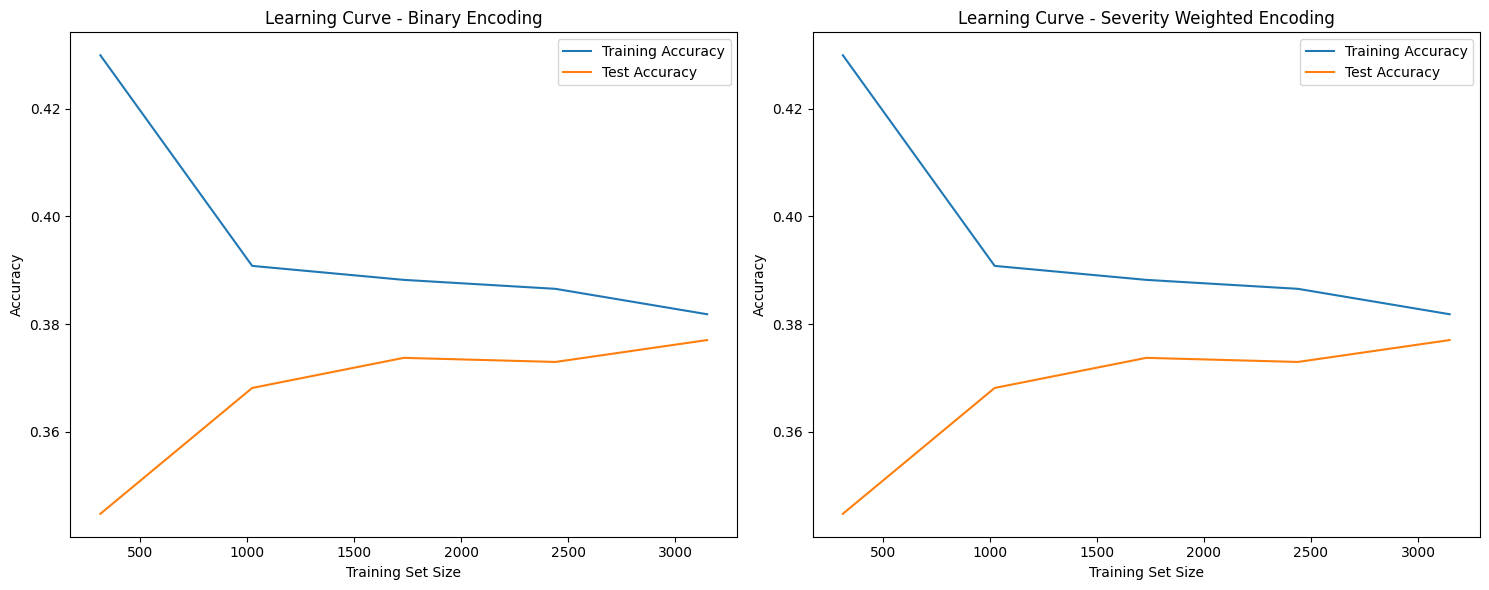

In [35]:
# Get learning curve data
train_sizes, train_scores, test_scores = learning_curve(dt_model_binary_bis, X_train_bin, y_train_bin, cv=5, scoring='accuracy')
train_sizes_w, train_scores_w, test_scores_w = learning_curve(dt_model_severity_bis, X_train_severity, y_train_severity, cv=5, scoring='accuracy')
# Create the plots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot learning curve for binary
axes[0].plot(train_sizes, train_scores.mean(axis=1), label='Training Accuracy')
axes[0].plot(train_sizes, test_scores.mean(axis=1), label='Test Accuracy')
axes[0].set_title('Learning Curve - Binary Encoding')
axes[0].set_xlabel('Training Set Size')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot learning curve for severity_w
axes[1].plot(train_sizes_w, train_scores_w.mean(axis=1), label='Training Accuracy')
axes[1].plot(train_sizes_w, test_scores_w.mean(axis=1), label='Test Accuracy')
axes[1].set_title('Learning Curve - Severity Weighted Encoding')
axes[1].set_xlabel('Training Set Size')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

In [21]:
# Perform cross-validation with 5 folds
cv_scores = cross_val_score(dt_model_binary_bis, X_binary_bis, y_binary_bis, cv=5, scoring='accuracy')

# Output the cross-validation scores for each fold
print(f"Cross-Validation Accuracy for each fold: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Accuracy: {cv_scores.std():.4f}")


Cross-Validation Accuracy for each fold: [0.94613821 0.94918699 0.94918699 0.95121951 0.95121951]
Mean Cross-Validation Accuracy: 0.9494
Standard Deviation of Accuracy: 0.0019


45 0.9493902439024391
45 0.9493902439024391


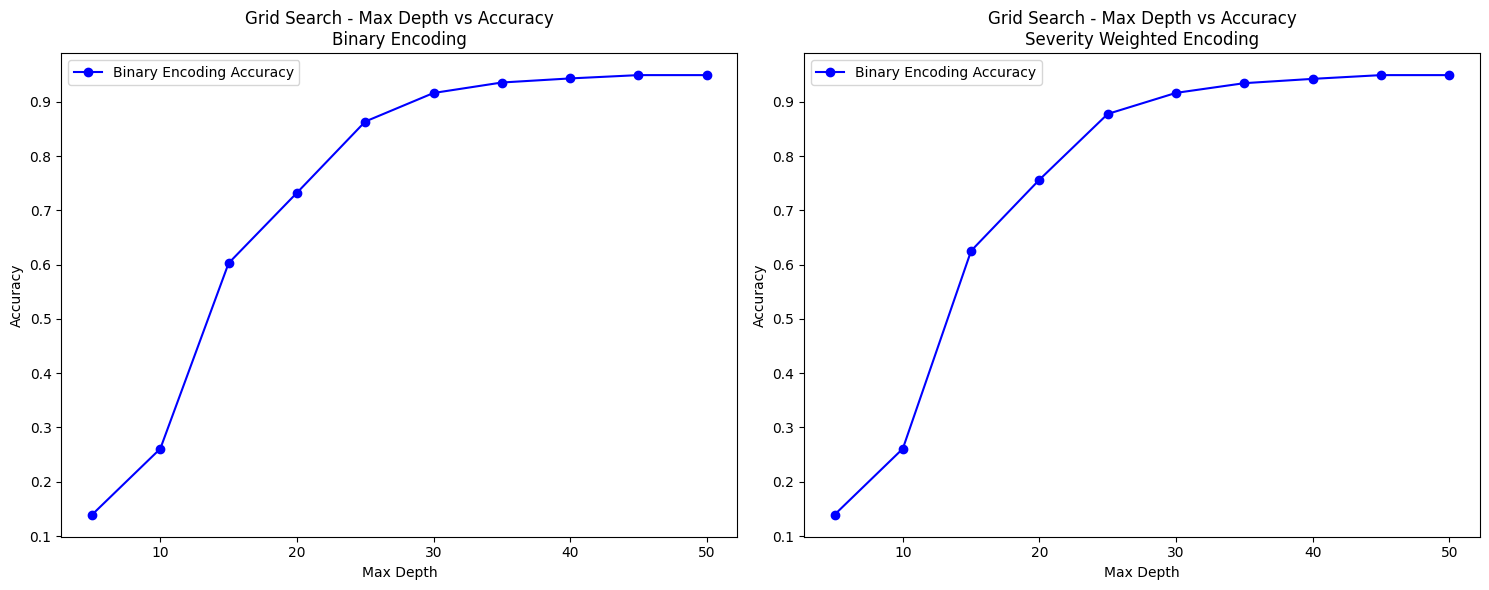

In [23]:
param_grid = {
    'max_depth': range(5,51,5)  # At 60 it goes up to 100% again 
}

    
# Grid search to find the best max_depth (hyperparameter tunning)
grid_search_binary = GridSearchCV(estimator=dt_model_binary_bis, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_binary.fit(X_binary_bis, y_binary_bis)

grid_search_severity_w = GridSearchCV(estimator=dt_model_severity_bis, param_grid = param_grid, cv=5, scoring='accuracy')
grid_search_severity_w.fit(X_severity_bis, y_severity_bis)
# Best depth and its accuracy
best_depth_binary = grid_search_binary.best_params_['max_depth']
best_accuracy_binary = grid_search_binary.best_score_
print(best_depth_binary, best_accuracy_binary)

best_depth_severity_w = grid_search_severity_w.best_params_['max_depth']
best_accuracy_severity_w = grid_search_severity_w.best_score_
print(best_depth_severity_w, best_accuracy_severity_w)


#plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

#for binary
axes[0].plot(param_grid['max_depth'], grid_search_binary.cv_results_['mean_test_score'], 'bo-', label='Binary Encoding Accuracy')
axes[0].set_title('Grid Search - Max Depth vs Accuracy\nBinary Encoding')
axes[0].set_xlabel('Max Depth')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# for Severity Weighted Encoding
axes[1].plot(param_grid['max_depth'], grid_search_severity_w.cv_results_['mean_test_score'], 'bo-', label='Binary Encoding Accuracy')
axes[1].set_title('Grid Search - Max Depth vs Accuracy\nSeverity Weighted Encoding')
axes[1].set_xlabel('Max Depth')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()